**Práctica final NLP: Análisis de Sentimiento con Amazon Book**

In [1]:
!pip install gensim scikit-learn matplotlib wordcloud

In [2]:
# 1.1 Descarga y carga del dataset

import pandas as pd
import gzip
import urllib.request
import json
import os

# URL y descarga del dataset
url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Books_5.json.gz"
ruta_local = "reviews_Books_5.json.gz"

if not os.path.exists(ruta_local):
    print("Descargando dataset...")
    urllib.request.urlretrieve(url, ruta_local)
else:
    print("El archivo ya existe.")

# Cargar una muestra de datos
def cargar_reviews_amazon(path, n_muestras=20000):
    data = []
    with gzip.open(path, 'rt') as f:
        for i, line in enumerate(f):
            data.append(json.loads(line))
            if i+1 >= n_muestras:
                break
    return pd.DataFrame(data)

df = cargar_reviews_amazon(ruta_local, n_muestras=20000)
print("Shape del dataframe:", df.shape)
df.head()

Descargando dataset...
Shape del dataframe: (20000, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5.0,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5.0,A Modern Rumi,1033948800,"10 7, 2002"


In [3]:
# 1.2 Previsualización y campos del dataset

print("Columnas del DataFrame:", df.columns.tolist())
df.head(3)

Columnas del DataFrame: ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,"01 18, 2014"


In [4]:
# 1.3 Cardinalidad del vocabulario

import re

all_text = ' '.join(df['reviewText'].dropna().astype(str)).lower()
tokens = re.findall(r'\b\w+\b', all_text)
vocab = set(tokens)
print(f"Cardinalidad del vocabulario: {len(vocab)}")

Cardinalidad del vocabulario: 52886


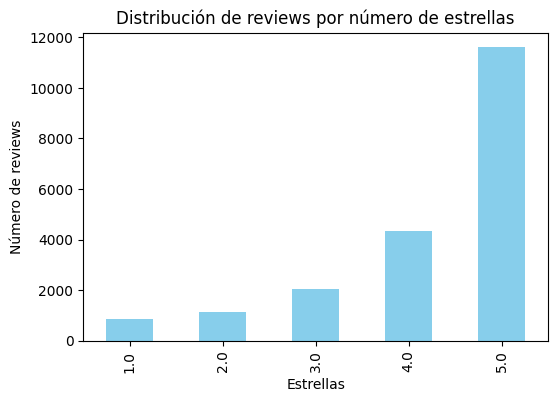

In [5]:
# 1.4 Distribución de reviews por número de estrellas

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de reviews por número de estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Número de reviews')
plt.show()

sentimiento
Positiva    15962
Neutral      2052
Negativa     1986
Name: count, dtype: int64


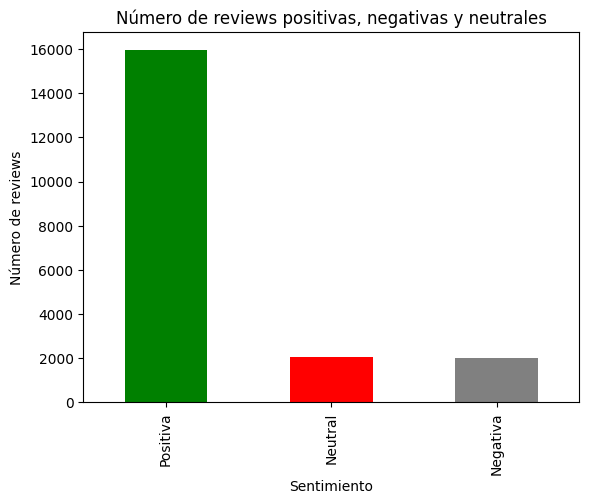

In [6]:
# 1.5 Número de reviews positivas y negativas

def etiqueta_sentimiento(star):
    if star >= 4:
        return 'Positiva'
    elif star <= 2:
        return 'Negativa'
    else:
        return 'Neutral'

df['sentimiento'] = df['overall'].apply(etiqueta_sentimiento)
print(df['sentimiento'].value_counts())

df['sentimiento'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title('Número de reviews positivas, negativas y neutrales')
plt.xlabel('Sentimiento')
plt.ylabel('Número de reviews')
plt.show()

In [7]:
# 1.6 N-grams más frecuentes

from collections import Counter

# Usamos la lista tokens definida antes
# Bigrams
bigrams = zip(tokens, tokens[1:])
bigram_freq = Counter(bigrams).most_common(10)
print("10 bigramas más frecuentes:")
for bg, freq in bigram_freq:
    print(' '.join(bg), ":", freq)

# Trigrams
trigrams = zip(tokens, tokens[1:], tokens[2:])
trigram_freq = Counter(trigrams).most_common(10)
print("\n10 trigramas más frecuentes:")
for tg, freq in trigram_freq:
    print(' '.join(tg), ":", freq)

10 bigramas más frecuentes:
of the : 26379
in the : 14025
this book : 13686
the book : 9692
is a : 8388
and the : 7722
to the : 7458
it is : 6629
the story : 6306
this is : 5745

10 trigramas más frecuentes:
one of the : 2179
of the book : 1966
this book is : 1930
this is a : 1817
the book is : 1313
i don t : 1301
it is a : 1194
in this book : 1148
read this book : 1109
some of the : 1103


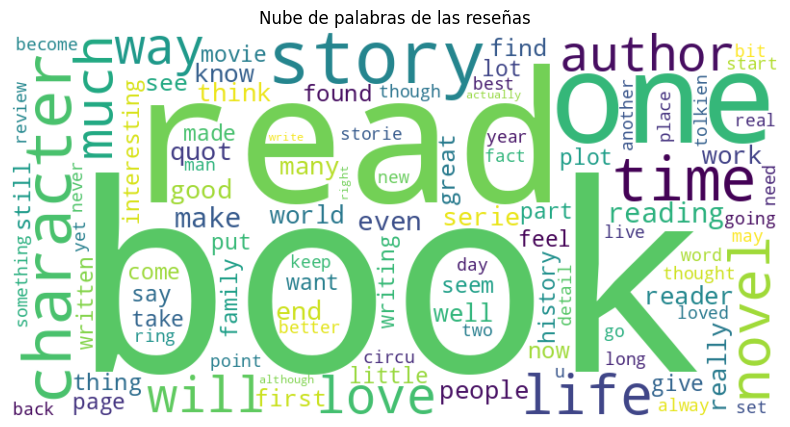

In [8]:
# 1.7 Nube de palabras (WordCloud)

from wordcloud import WordCloud

texto_wc = ' '.join(df['reviewText'].dropna().astype(str)).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(texto_wc)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las reseñas')
plt.show()

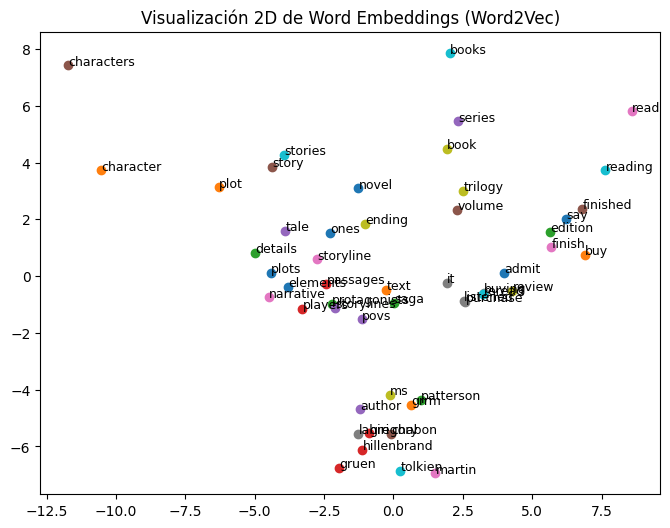

In [9]:
# 1.8 Visualización en 2D de Word2Vec

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt

# Tokenización básica para cada reseña
tokenized_reviews = [re.findall(r'\b\w+\b', str(text).lower()) for text in df['reviewText'].dropna()]

# Entrenamiento Word2Vec
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=5, workers=4, seed=42)

palabras_objetivo = ['book', 'story', 'read', 'author', 'characters']
palabras_similares = []
for w in palabras_objetivo:
    if w in model.wv:
        similares = [w] + [sim[0] for sim in model.wv.most_similar(w, topn=10)]
        palabras_similares.extend(similares)
palabras_similares = list(set(palabras_similares))

# Filtrar solo palabras realmente presentes en el vocabulario del modelo
palabras_similares = [w for w in palabras_similares if w in model.wv]

# Solo continua si hay al menos 2 palabras para graficar
if len(palabras_similares) < 2:
    print("No hay suficientes palabras frecuentes para visualizar embeddings. Prueba con otras palabras o más datos.")
else:
    vectores = [model.wv[w] for w in palabras_similares]
    pca = PCA(n_components=2)
    vectores_2d = pca.fit_transform(vectores)
    plt.figure(figsize=(8,6))
    for i, palabra in enumerate(palabras_similares):
        plt.scatter(vectores_2d[i,0], vectores_2d[i,1])
        plt.text(vectores_2d[i,0]+0.01, vectores_2d[i,1]+0.01, palabra, fontsize=9)
    plt.title('Visualización 2D de Word Embeddings (Word2Vec)')
    plt.show()

In [10]:
# 1.9 Conclusiones de la exploración

print("""
CONCLUSIONES:
- La exploración muestra un corpus rico y variado, pero con fuerte desbalance hacia reseñas positivas.
- El lenguaje es diverso y refleja el contexto literario.
- Los n-gramas y la nube de palabras evidencian el predominio de sentimientos positivos y de términos clave del dominio de libros.
- Los embeddings confirman que el modelo es capaz de captar relaciones semánticas entre palabras relevantes.
""")


CONCLUSIONES:
- La exploración muestra un corpus rico y variado, pero con fuerte desbalance hacia reseñas positivas.
- El lenguaje es diverso y refleja el contexto literario.
- Los n-gramas y la nube de palabras evidencian el predominio de sentimientos positivos y de términos clave del dominio de libros.
- Los embeddings confirman que el modelo es capaz de captar relaciones semánticas entre palabras relevantes.

